## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [4]:
mses = {'LinReg' : 0, 'SVR': 0, 'DTR':0, 'RFR':0, 'KNNR':0}
r2s = {'LinReg' : 0, 'SVR': 0, 'DTR':0, 'RFR':0, 'KNNR':0}

## Importing the Data

In [5]:
dataset = pd.read_csv('machine.data', header = None)
dataset.shape

(209, 10)

In [6]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


## Create X and Y

In [7]:
X = dataset.iloc[:, 2:8].values
Y = dataset.iloc[:, 8].values

In [8]:
X.shape

(209, 6)

In [9]:
Y.shape

(209,)

In [10]:
X

array([[  125,   256,  6000,   256,    16,   128],
       [   29,  8000, 32000,    32,     8,    32],
       [   29,  8000, 32000,    32,     8,    32],
       ..., 
       [  125,  2000,  8000,     0,     2,    14],
       [  480,   512,  8000,    32,     0,     0],
       [  480,  1000,  4000,     0,     0,     0]], dtype=int64)

In [11]:
Y

array([ 198,  269,  220,  172,  132,  318,  367,  489,  636, 1144,   38,
         40,   92,  138,   10,   35,   19,   28,   31,  120,   30,   33,
         61,   76,   23,   69,   33,   27,   77,   27,  274,  368,   32,
         63,  106,  208,   20,   29,   71,   26,   36,   40,   52,   60,
         72,   72,   18,   20,   40,   62,   24,   24,  138,   36,   26,
         60,   71,   12,   14,   20,   16,   22,   36,  144,  144,  259,
         17,   26,   32,   32,   62,   64,   22,   36,   44,   50,   45,
         53,   36,   84,   16,   38,   38,   16,   22,   29,   40,   35,
        134,   66,  141,  189,   22,  132,  237,  465,  465,  277,  185,
          6,   24,   45,    7,   13,   16,   32,   32,   11,   11,   18,
         22,   37,   40,   34,   50,   76,   66,   24,   49,   66,  100,
        133,   12,   18,   20,   27,   45,   56,   70,   80,  136,   16,
         26,   32,   45,   54,   65,   30,   50,   40,   62,   60,   50,
         66,   86,   74,   93,  111,  143,  105,  2

## Preprocess the Data

In [13]:
sc_X = StandardScaler()

In [14]:
X = sc_X.fit_transform(X)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
X

array([[-0.30358614, -0.67502598, -0.49546221,  5.69420785,  1.66198873,
         4.23103334],
       [-0.67332952,  1.32629082,  1.72704937,  0.16762947,  0.48550899,
         0.52947875],
       [-0.67332952,  1.32629082,  1.72704937,  0.16762947,  0.48550899,
         0.52947875],
       ..., 
       [-0.30358614, -0.2243162 , -0.32449978, -0.62188173, -0.39685082,
        -0.16456273],
       [ 1.06369405, -0.60886675, -0.32449978,  0.16762947, -0.69097076,
        -0.70437278],
       [ 1.06369405, -0.48275071, -0.66642464, -0.62188173, -0.69097076,
        -0.70437278]])

## Create Train and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [17]:
X_train.shape

(167, 6)

In [18]:
X_test.shape

(42, 6)

In [19]:
Y_train.shape

(167,)

In [20]:
Y_test.shape

(42,)

## Linear Regression

In [21]:
reg_lin = LinearRegression()

In [22]:
reg_lin.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
Y_pred_lin = reg_lin.predict(X_test)

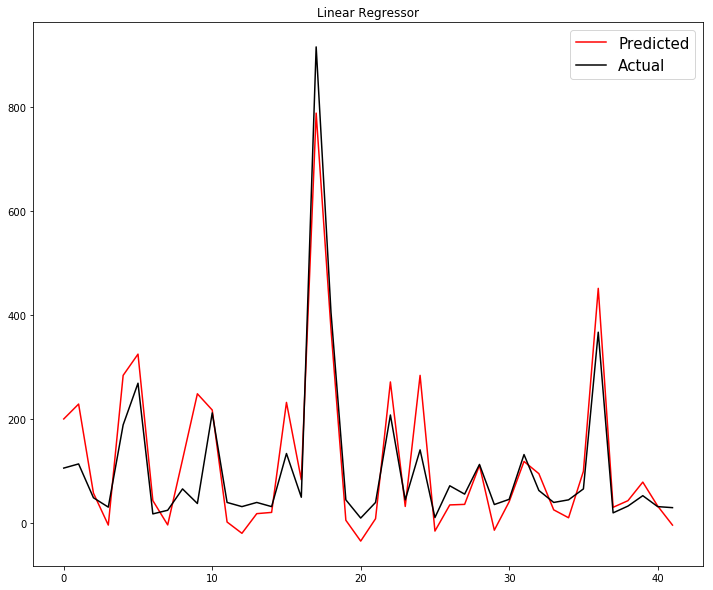

In [24]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_lin, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('Linear Regressor')
plt.show()

## SVR

In [25]:
reg_lsvr = SVR(kernel = 'linear')

In [26]:
reg_lsvr.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
Y_pred_lsvr = reg_lsvr.predict(X_test)

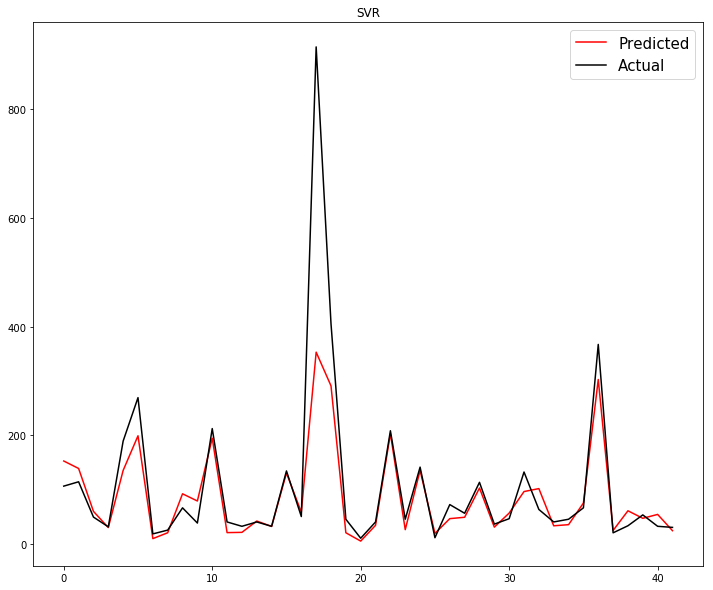

In [28]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_lsvr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('SVR')
plt.show()

## Decision Tree Regressor

In [29]:
reg_dtr = DecisionTreeRegressor()

In [30]:
reg_dtr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
Y_pred_dtr = reg_dtr.predict(X_test)

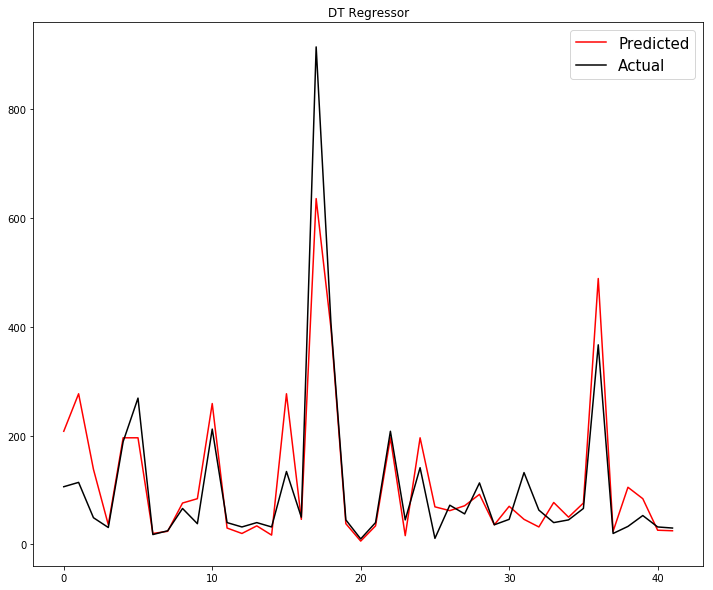

In [32]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_dtr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('DT Regressor')
plt.show()

## Random Forest Regressor

In [33]:
reg_rfr = RandomForestRegressor(n_estimators=200)

In [34]:
reg_rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
Y_pred_rfr = reg_rfr.predict(X_test)

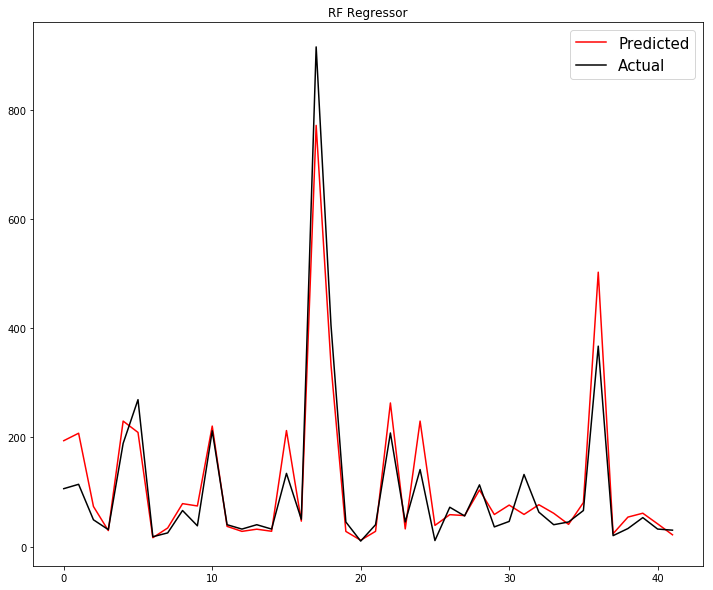

In [36]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_rfr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('RF Regressor')
plt.show()

## KNN Regressor

In [37]:
reg_knnr = KNeighborsRegressor(n_neighbors = 2)

In [38]:
reg_knnr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [39]:
Y_pred_knnr = reg_knnr.predict(X_test)

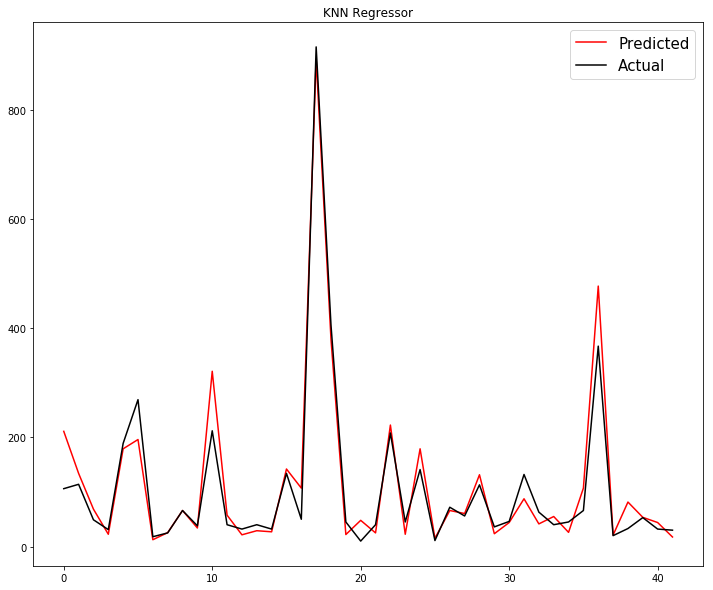

In [40]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_knnr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('KNN Regressor')
plt.show()

## Metrics

In [41]:
mses['LinReg'] = mean_squared_error(Y_pred_lin, Y_test)
mses['SVR'] = mean_squared_error(Y_pred_lsvr, Y_test)
mses['DTR'] = mean_squared_error(Y_pred_dtr, Y_test)
mses['RFR'] = mean_squared_error(Y_pred_rfr, Y_test)
mses['KNNR'] = mean_squared_error(Y_pred_knnr, Y_test)
mses

{'DTR': 4604.1904761904761,
 'KNNR': 1396.8095238095239,
 'LinReg': 3907.5986048885229,
 'RFR': 2271.0014048486169,
 'SVR': 8426.2035441302833}

In [42]:
r2s['LinReg'] = r2_score(Y_pred_lin, Y_test)
r2s['SVR'] = r2_score(Y_pred_lsvr, Y_test)
r2s['DTR'] = r2_score(Y_pred_dtr, Y_test)
r2s['RFR'] = r2_score(Y_pred_rfr, Y_test)
r2s['KNNR'] = r2_score(Y_pred_knnr, Y_test)
r2s

{'DTR': 0.74442610753227523,
 'KNNR': 0.94441249555424633,
 'LinReg': 0.84565246623745183,
 'RFR': 0.89100558922328399,
 'SVR': -0.2373813346005591}